In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_groups = [1, 18, 25, 35, 45, 50, 56]

ratings_df = pd.read_table('ml-1m/ratings.dat', header=None, sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python', encoding="ISO-8859-1")
movies_df = pd.read_table('ml-1m/movies.dat', header=None, sep='::', names=['movie_id', 'movie_title', 'movie_genre'], engine='python', encoding="ISO-8859-1")
users_df = pd.read_table('ml-1m/users.dat', header=None, sep='::', names=['user_id', 'gender', 'age', 'occupation_id', 'zip_code'], engine='python', encoding="ISO-8859-1")

In [2]:
ratings_df[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
movies_df[:5]

,movie_id,movie_title,movie_genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
users_df[:5]

,user_id,gender,age,occupation_id,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
merged_df = pd.merge(pd.merge(ratings_df, movies_df, on='movie_id'), users_df, on='user_id')

merged_df[:5]

,user_id,movie_id,rating,timestamp,movie_title,movie_genre,gender,age,occupation_id,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [25]:
mean_ratings = merged_df.pivot_table('rating', index='movie_title',
                                columns=['gender', 'age'], aggfunc='mean')
mean_ratings[:10]

gender                                    F                                \
age                                      1         18        25        35   
movie_title                                                                 
$1,000,000 Duck (1971)                  NaN  5.000000  3.333333  3.222222   
'Night Mother (1986)               3.000000  4.500000  3.500000  3.000000   
'Til There Was You (1997)          2.000000  2.666667  2.666667  3.000000   
'burbs, The (1989)                      NaN  3.035714  2.540541  3.062500   
...And Justice for All (1979)           NaN       NaN  3.777778  3.750000   
1-900 (1994)                            NaN       NaN  2.000000       NaN   
10 Things I Hate About You (1999)  4.035714  3.487179  3.726190  3.388889   
101 Dalmatians (1961)              3.812500  3.395833  3.764706  4.000000   
101 Dalmatians (1996)              3.470588  2.636364  3.142857  3.238095   
12 Angry Men (1957)                3.600000  3.666667  4.523810  4.166667   

gender                                                                  M  \
age                                      45        50        56        1    
movie_title                                                                 
$1,000,000 Duck (1971)                  NaN  3.333333       NaN       NaN   
'Night Mother (1986)               3.750000  2.750000       NaN  1.000000   
'Til There Was You (1997)          2.500000  2.500000  3.000000  5.000000   
'burbs, The (1989)                 2.000000  3.142857  1.000000  4.500000   
...And Justice for All (1979)      4.000000  3.666667  4.333333  3.000000   
1-900 (1994)                            NaN       NaN       NaN       NaN   
10 Things I Hate About You (1999)  3.666667  3.545455  4.000000  3.444444   
101 Dalmatians (1961)              4.307692  4.125000  3.666667  3.263158   
101 Dalmatians (1996)              3.777778  4.250000  3.666667  2.705882   
12 Angry Men (1957)                4.384615  4.388889  4.000000  5.000000   

gender                                                                     \
age                                      18        25        35        45   
movie_title                                                                 
$1,000,000 Duck (1971)             2.600000  3.000000  3.000000  2.000000   
'Night Mother (1986)               5.000000  3.250000  2.857143  4.000000   
'Til There Was You (1997)          2.000000  2.666667  2.857143  2.000000   
'burbs, The (1989)                 3.338710  2.705128  2.717949  2.750000   
...And Justice for All (1979)      3.428571  3.714286  3.637931  4.133333   
1-900 (1994)                            NaN       NaN       NaN       NaN   
10 Things I Hate About You (1999)  3.382857  3.293785  3.000000  3.000000   
101 Dalmatians (1961)              3.229730  3.557971  3.733333  3.833333   
101 Dalmatians (1996)              2.375000  2.761905  3.313725  3.350000   
12 Angry Men (1957)                4.161765  4.379518  4.406250  4.244898   

gender                                                 
age                                      50        56  
movie_title                                            
$1,000,000 Duck (1971)             1.000000       NaN  
'Night Mother (1986)               4.200000  4.333333  
'Til There Was You (1997)               NaN  2.000000  
'burbs, The (1989)                 3.235294  3.000000  
...And Justice for All (1979)      3.521739  3.818182  
1-900 (1994)                            NaN  3.000000  
10 Things I Hate About You (1999)  3.687500  4.000000  
101 Dalmatians (1961)              3.333333  3.111111  
101 Dalmatians (1996)              3.000000  3.500000  
12 Angry Men (1957)                4.250000  4.292683

In [60]:
female_ratings = mean_ratings['F']
male_ratings = mean_ratings['M']

In [35]:
female_ratings[:5]

age,1,18,25,35,45,50,56
movie_title,,,,,,,
"$1,000,000 Duck (1971)",NaN,5.000000,3.333333,3.222222,NaN,3.333333,NaN
'Night Mother (1986),3.0,4.500000,3.500000,3.000000,3.75,2.750000,NaN
'Til There Was You (1997),2.0,2.666667,2.666667,3.000000,2.50,2.500000,3.000000
"'burbs, The (1989)",NaN,3.035714,2.540541,3.062500,2.00,3.142857,1.000000
...And Justice for All (1979),NaN,NaN,3.777778,3.750000,4.00,3.666667,4.333333


In [36]:
male_ratings[:5]

age,1,18,25,35,45,50,56
movie_title,,,,,,,
"$1,000,000 Duck (1971)",NaN,2.600000,3.000000,3.000000,2.000000,1.000000,NaN
'Night Mother (1986),1.0,5.000000,3.250000,2.857143,4.000000,4.200000,4.333333
'Til There Was You (1997),5.0,2.000000,2.666667,2.857143,2.000000,NaN,2.000000
"'burbs, The (1989)",4.5,3.338710,2.705128,2.717949,2.750000,3.235294,3.000000
...And Justice for All (1979),3.0,3.428571,3.714286,3.637931,4.133333,3.521739,3.818182


In [58]:
for age in age_groups:
    age_group_ratings = female_ratings[age].sort_values(ascending=False)
    print("Females, Age group =", age)
    print("_________________________")
    print(age_group_ratings[:10])
    print('\n')

Females, Age group =  1
_________________________
movie_title
Trip to Bountiful, The (1985)                     5.0
Brief Encounter (1946)                            5.0
Piano, The (1993)                                 5.0
Candleshoe (1977)                                 5.0
Pink Floyd - The Wall (1982)                      5.0
Thunderball (1965)                                5.0
Threesome (1994)                                  5.0
Burnt By the Sun (Utomlyonnye solntsem) (1994)    5.0
Aparajito (1956)                                  5.0
In Search of the Castaways (1962)                 5.0
Name: 1, dtype: float64


Females, Age group =  18
_________________________
movie_title
$1,000,000 Duck (1971)                 5.0
Tetsuo II: Body Hammer (1992)          5.0
Foreign Correspondent (1940)           5.0
Five Easy Pieces (1970)                5.0
Stalag 17 (1953)                       5.0
Mother Night (1996)                    5.0
Creepshow 2 (1987)                     5.0
Fast, Ch

In [59]:
for age in age_groups:
    age_group_ratings = male_ratings[age].sort_values(ascending=False)
    print("Males, Age group =", age)
    print("_________________________")
    print(age_group_ratings[:10])
    print('\n')

Males, Age group = 1
_________________________
movie_title
Paradise Lost: The Child Murders at Robin Hood Hills (1996)    5.0
Trust (1990)                                                   5.0
Diabolique (1996)                                              5.0
Buena Vista Social Club (1999)                                 5.0
Baraka (1992)                                                  5.0
Fanny and Alexander (1982)                                     5.0
Phantasm II (1988)                                             5.0
Phantasm III: Lord of the Dead (1994)                          5.0
Alphaville (1965)                                              5.0
Ulee's Gold (1997)                                             5.0
Name: 1, dtype: float64


Males, Age group = 18
_________________________
movie_title
When Night Is Falling (1995)                        5.0
Nobody Loves Me (Keiner liebt mich) (1994)          5.0
Great Day in Harlem, A (1994)                       5.0
42 Up (1998)     

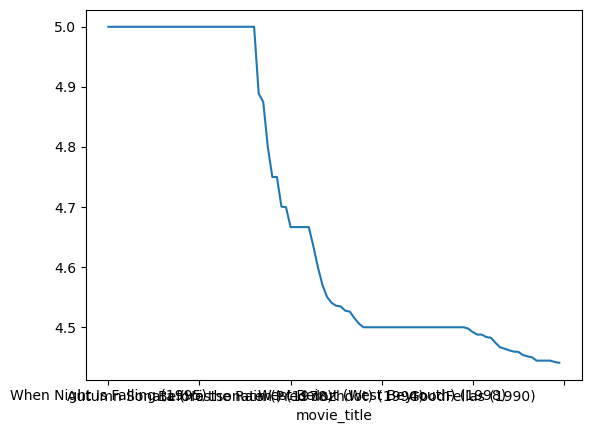

In [101]:
random_group_random_gender_ratings = male_ratings[18].sort_values(ascending=False)[:100]
random_group_random_gender_ratings.plot()

plt.show()